# TDPA (transito diario promedio anual)

## INTRODUCCIÓN

.- Las carreteras son una parte de la infraestructura que se vuelve muy importante para el desarrollo económico de un país. ​

.- Gran parte de los recursos de un país se destina a la elaboración de caminos y vías que puedan conectar lugares y personas​

.- El diseño de una carretera podría parecer sencillo, pero realmente para un correcto diseño tenemos que tomar en cuenta muchos factores, como por ejemplo el transito diario promedio anual a futuro. Según los años de vida que queramos darle a la carretera, ya sea a 15 años o más. ​

## OBJETIVOS

### OBJETIVOS GENERALES

.- Encontrar el TDPA de la carretera 18 León - Aguascalientes para el año 2036 utilizando el ajuste de curvas en Python.

## Objetivos Específicos 

.- Graficar el TDPA respecto al año y encontrar la función lineal que mejor represente el crecimiento de este.​

.- Con el valor de la pendiente aplicar la formula para encontrar el imc y calcular el TDPA para 15 años a futuro.​

## Proceso:

1. Extraemos los datos de la página de la Secretaría de Comunicación y Transporte
2. Creamos la gráfica, donde se graficó sobre el eje de las X los años y sobre el eje de las Y el TDPA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     Año   TDPA
0   2009  31834
1   2010  33767
2   2011  36511
3   2012  37197
4   2013  39487
5   2014  41435
6   2015  44352
7   2016  45716
8   2017  47960
9   2018  51152
10  2019  52775
11  2020  62912
12  2021  47921


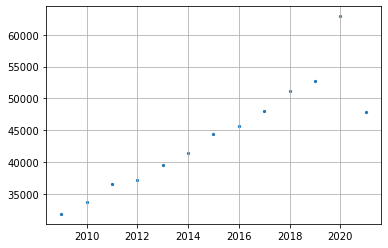

In [2]:
i = np.arange(13)
df= pd.DataFrame(index=i, columns=["Año", "TDPA"])
df["Año"] = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
df["TDPA"] = [31834,33767,36511,37197,39487,41435,44352,45716,47960,51152,52775,62912,47921]

df.head(5)
print (df)
x = df["Año"]
y = df["TDPA"]
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

3. Usando la función de Minimize se aplica el teorema de los mínimos cuadrados, para encontrar la función lineal que se ajuste      más al comportamiento del TDPA en los años seleccionados.
4. La pendiente obtenida es el valor de A



In [3]:
import scipy.optimize as opt

def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol


      fun: 148094329.0905676
 hess_inv: array([[ 6.78571059e-06, -1.53876918e-08],
       [-1.53876918e-08,  9.49040459e-09]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 271
      nit: 15
     njev: 90
   status: 0
  success: True
        x: array([-4.05233448e+06,  2.03295924e+03])

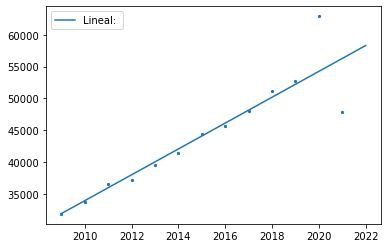

In [4]:
xn = np.linspace(2009, 2022, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Lineal: ")
plt.legend(loc="best")


In [5]:
A=sol.x[1]
A


2032.9592437544775

5. Se obtinene el imc con base al valor de A y la siguinte fórmula:
   $$ N(A) / (ΣY - (A)(ΣX)) $$
   

In [10]:
N=13
SY=sum(y)
SX=sum(i)
imc=(N*A)/(SY-A*SX)
imc

0.06376785207114537

6. Una vez obtenido el imc, obtenemos el TDPA para el año que queramos mediante la fórmula: 
   $$ TDPA_{final}=TDPA_{inicial}(1+imc)^n $$

In [7]:
TDPA2036=y[12]*(1+imc)**15
TDPA2036

121123.60659141565

## Conclusiones

.- Gracias a la programación pudimos cumplir con nuestros objetivos. 
   Ya que optimizamos la manera de resolver un problema de ingeniería civil. ​

.- A través del tema ajuste de curvas pudimos calcular el porcentaje de la tasa 
   de crecimiento anual (imc) por el método de los mínimos cuadrados 
   y de esta manera calculamos el TDPA de la carretera León Aguascalientes para el año 2036, 
   buscando darle 15 años de vida a nuestro diseño de carretera.​

​

## Bibliografía APA​

.- AASHTO Guide for Design of Pavement Structures, Washington, DC.: American Association of State Highway and Transportation Officials​

.- (2018)” MANUAL DE PROYECTO GEOMÉTRICO DE CARRETERAS “. Disponible en: https://comunicaciones.edomex.gob.mx/sites/comunicaciones.edomex.gob.mx/files/files/ SCT%20-%20Manual%20Proyecto%20Geometrico%20Carreteras%202018.pdf. [Consultado el 13 de marzo de 2022, a las 16:52 hrs.] ​

.- Ing.Corro c. Santiago, Ing. Prado O. Guillermo (1999)” DISEÑO ESTRUCTURAL DE PAVIMENTOS ASFÁLTICOS, INCLUYENDO CARRETERAS DE ALTAS ESPECIFICACIONES, DISPAV-5 - VERSIÓN 2.0”. Disponible en: https://datosabiertos.unam.mx/CCUD_DOR_WSwar/resources/doil/4945567d96f6492b .[Consultado el 13 de marzo de 2022, a las 17:39 hrs.]​